In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [5]:
for i in [train, test]:
    i['max_power'].replace(to_replace='0', value=None, inplace=True)

In [6]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    for j in i[i.torque.str.contains('kgm', na=False)].index:
        i.torque_nm[j] = i.torque_nm[j] * 10

In [7]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=-1, inplace=True)

In [8]:
for i in [train, test]:
    i['brand_price'] = i['brand_extend'].copy()
    for j in i.brand_extend.unique():
        i['brand_price'].replace(to_replace=j, value = train[train.brand_extend == j].selling_price.mean()/100000, inplace=True)

In [9]:
#train = train[train['selling_price'] < 9000000]

In [10]:
for i in [train, test]:
    for j in ['n_mileage', 'n_engine', 'n_max_power', 'torque_nm', 'seats']:
        for k in i[i[j].isna()].index:
            i.at[k, j] = train[train.brand_extend == i.loc[k].brand_extend][j].mean()

In [11]:
for i in test[test.brand_price.isna()].index:
    test.at[i, 'brand_price'] = train[train.brand == test.loc[i].brand].selling_price.mean()/100000

In [12]:
for i in [train, test]:
    for j in ['n_mileage', 'n_engine', 'n_max_power', 'torque_nm', 'seats']:
        for k in i[i[j].isna()].index:
            i.at[k, j] = train[train.brand == i.loc[k].brand][j].mean()

In [13]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
brand_price         AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

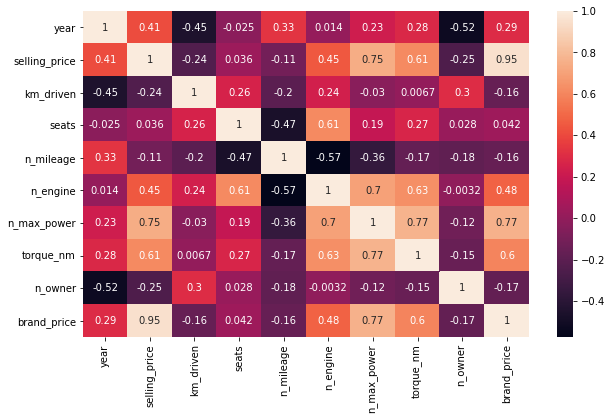

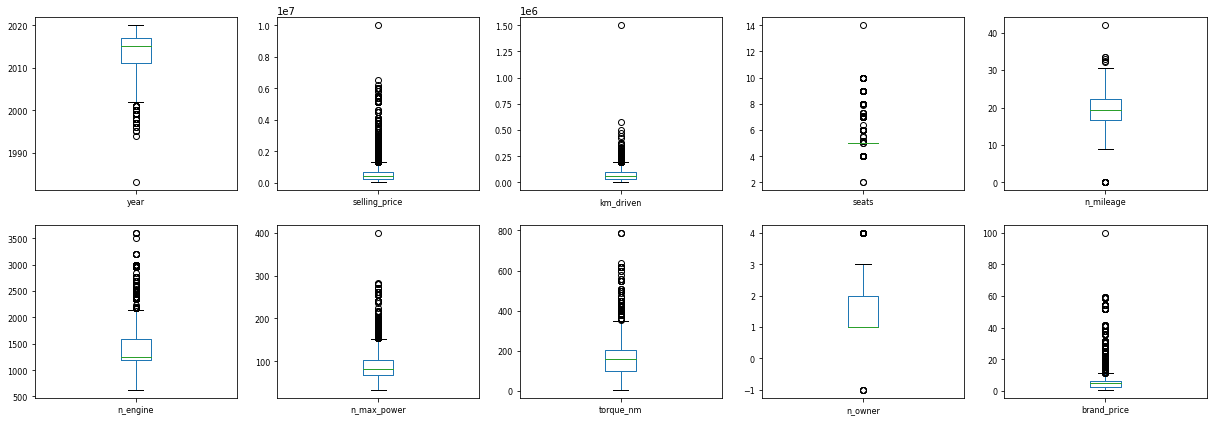

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

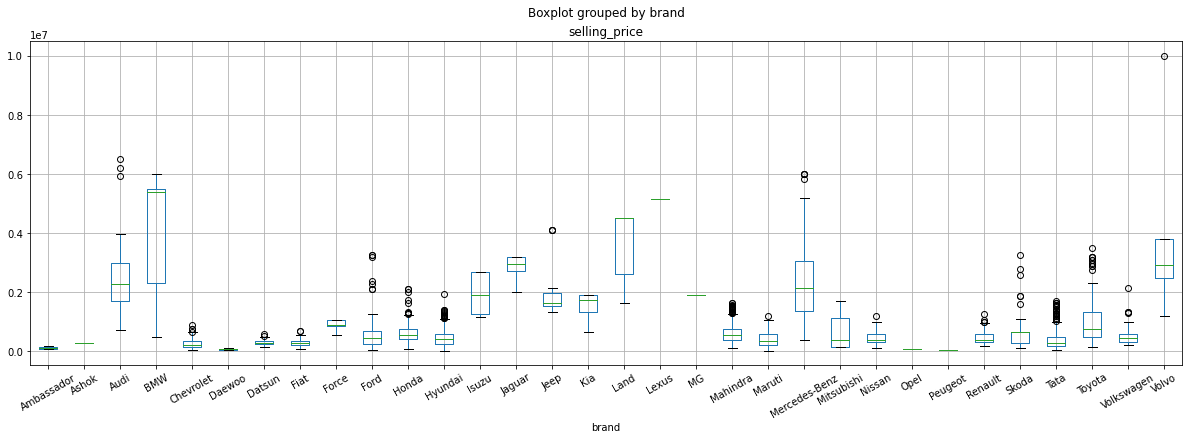

In [15]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [16]:
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6000 non-null   object 
 1   year              6000 non-null   int64  
 2   selling_price     6000 non-null   int64  
 3   km_driven         6000 non-null   int64  
 4   fuel              6000 non-null   object 
 5   seller_type       6000 non-null   object 
 6   transmission      6000 non-null   object 
 7   owner             6000 non-null   object 
 8   mileage           5841 non-null   object 
 9   engine            5841 non-null   object 
 10  max_power         5846 non-null   object 
 11  torque            5840 non-null   object 
 12  seats             6000 non-null   float64
 13  brand             6000 non-null   object 
 14  brand_extend      6000 non-null   object 
 15  n_mileage         6000 non-null   float64
 16  n_engine          6000 non-null   float64


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2128 non-null   int64  
 1   name              2128 non-null   object 
 2   year              2128 non-null   int64  
 3   km_driven         2128 non-null   int64  
 4   fuel              2128 non-null   object 
 5   seller_type       2128 non-null   object 
 6   transmission      2128 non-null   object 
 7   owner             2128 non-null   object 
 8   mileage           2066 non-null   object 
 9   engine            2066 non-null   object 
 10  max_power         2067 non-null   object 
 11  torque            2066 non-null   object 
 12  seats             2128 non-null   float64
 13  brand             2128 non-null   object 
 14  brand_extend      2128 non-null   object 
 15  n_mileage         2128 non-null   float64
 16  n_engine          2128 non-null   float64


# Build model

In [19]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,108.50,260.00,1,8.203792,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,88.76,219.66,1,5.268257,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,168.50,360.00,2,19.052353,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,121.30,154.90,1,5.211818,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,190.00,400.00,1,37.833333,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,66.10,90.00,1,1.999999,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,58.16,77.00,1,2.668742,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,84.00,114.00,1,5.497368,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,63.00,180.00,2,4.777070,1,0,0,1,1,0


In [20]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.00,1,5.874468,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.00,1,5.620992,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.00,1,4.957076,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.00,1,6.237744,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.00,1,6.157647,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,81.86,113.75,1,4.714676,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,74.02,190.00,2,4.826533,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,52.80,85.00,2,1.568569,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,126.20,259.90,2,10.134098,1,0,0,1,1,0


In [21]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)
y = train['selling_price']

In [22]:
x

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,1497.0,108.50,260.00,1,8.203792,1,0,0,1,1,0
1,2018,30000,5.0,1396.0,88.76,219.66,1,5.268257,1,0,0,1,1,0
2,2015,80000,7.0,2982.0,168.50,360.00,2,19.052353,1,0,0,0,1,0
3,2015,35000,5.0,1591.0,121.30,154.90,1,5.211818,0,0,1,1,1,0
4,2019,20000,5.0,1969.0,190.00,400.00,1,37.833333,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,50000,5.0,998.0,66.10,90.00,1,1.999999,0,0,1,1,1,0
5996,2018,40000,5.0,998.0,58.16,77.00,1,2.668742,0,0,0,1,1,0
5997,2018,75000,5.0,1199.0,84.00,114.00,1,5.497368,0,0,1,1,1,0
5998,2011,100000,9.0,2523.0,63.00,180.00,2,4.777070,1,0,0,1,1,0


In [23]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)

In [24]:
x_test

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,1598.0,103.50,153.00,1,5.874468,0,0,1,0,0,0
1,2017,35000,5.0,1497.0,117.30,145.00,1,5.620992,0,0,1,1,1,0
2,2014,80000,5.0,1197.0,82.00,114.00,1,4.957076,0,0,1,1,1,0
3,2014,145241,7.0,2179.0,120.00,290.00,1,6.237744,1,0,0,1,1,0
4,2015,92651,5.0,1498.0,98.96,215.00,1,6.157647,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2020,2000,5.0,1197.0,81.86,113.75,1,4.714676,0,0,1,1,0,0
2124,2018,100000,5.0,1248.0,74.02,190.00,2,4.826533,1,0,0,1,1,0
2125,2011,172000,5.0,1396.0,52.80,85.00,2,1.568569,1,0,0,1,1,0
2126,2017,47000,5.0,1582.0,126.20,259.90,2,10.134098,1,0,0,1,1,0


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import metrics

In [28]:
result3 = pd.DataFrame(columns=['max_depth','n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(13,18):
    for j in range(55,66):
        extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=j)
        extra_tree.fit(x_train,y_train)

        train_pred = extra_tree.predict(x_train)
        val_pred = extra_tree.predict(x_val)

        train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
        train_r2 = metrics.r2_score(y_train, train_pred)
        val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
        val_r2 = metrics.r2_score(y_val, val_pred)

        result3 = result3.append(pd.Series({'max_depth': i,'n_es': j, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result3.sort_values(by='Val_RMSE')

,max_depth,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
30,15.0,63.0,34505.477597,0.998174,98914.979021,0.984812
29,15.0,62.0,34403.701370,0.998185,99119.569419,0.984749
31,15.0,64.0,34441.480129,0.998181,99265.956959,0.984704
26,15.0,59.0,34391.708588,0.998186,99310.314301,0.984691
25,15.0,58.0,34358.932120,0.998190,99359.028575,0.984676
24,15.0,57.0,34422.365269,0.998183,99362.972270,0.984674
32,15.0,65.0,34459.517401,0.998179,99370.838516,0.984672
28,15.0,61.0,34457.427915,0.998179,99427.860077,0.984654
27,15.0,60.0,34377.428003,0.998188,99434.574461,0.984652
23,15.0,56.0,34459.611305,0.998179,99557.743952,0.984614


In [29]:
extra_tree = ExtraTreesRegressor(random_state=42, max_depth=15, n_estimators=63)
extra_tree.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=15, n_estimators=63, random_state=42)

In [30]:
train_pred = extra_tree.predict(x_train)
val_pred = extra_tree.predict(x_val)

In [31]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2 :', metrics.r2_score(y_train, train_pred))
print('')
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
print('R^2 :', metrics.r2_score(y_val, val_pred))

Train set:
RMSE: 34505.477597075864
R^2 : 0.9981743314895368

Validation set:
RMSE: 98914.97902092835
R^2 : 0.9848121717579258


In [32]:
test_pred = extra_tree.predict(x_test)

In [33]:
submit = sample.copy()

In [34]:
submit.Predicted = test_pred

In [35]:
submit

,Id,Predicted
0,1,6.446772e+05
1,2,8.775028e+05
2,3,4.242680e+05
3,4,5.858668e+05
4,5,5.764301e+05
...,...,...
2123,2124,6.009452e+05
2124,2125,6.865892e+05
2125,2126,1.435063e+05
2126,2127,1.081875e+06


In [36]:
submit.to_csv(path_or_buf= path + 'submit_15_12_2.csv', index=False)